# Домашнее задание «Функции и работа с данными»

**Задание 1**

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [1]:
import pandas as pd

In [2]:
rating_df = pd.read_csv('ml-latest-small/ratings.csv')

In [3]:
def classify_by_rating(value):
    if value:
        if value <= 2:
            return 'low'
        elif 2 < value <= 4:
            return 'middle'
        else:
            return 'high'
    else:
        return 'not classified'


In [4]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
rating_df['class'] = rating_df['rating'].apply(classify_by_rating)
rating_df

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,middle
1,1,1029,3.0,1260759179,middle
2,1,1061,3.0,1260759182,middle
3,1,1129,2.0,1260759185,low
4,1,1172,4.0,1260759205,middle
...,...,...,...,...,...
99999,671,6268,2.5,1065579370,middle
100000,671,6269,4.0,1065149201,middle
100001,671,6365,4.0,1070940363,middle
100002,671,6385,2.5,1070979663,middle


**Задание 2**

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:
```
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}
```
Результат классификации запишите в отдельный столбец region.

In [6]:
geo_data = {
        'Центр': ['москва', 'тула', 'ярославль'],
        'Северо-Запад': ['петербург', 'псков', 'мурманск'],
        'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
    }

In [7]:
keywords_df = pd.read_csv('ml-latest-small/keywords.csv')
keywords_df.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [8]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   keyword  100000 non-null  object
 1   shows    100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [13]:
# чтобы понять, есть ли в запросах нужные нам гео-метки, нам нужно будет искать общие элементы в двух списках: гоодов и слов запроса
# если мы обернем эти списки в множества, можно будет воспользоваться методом, возвращающим пересечение множеств
geo_data = {k: set(v) for k, v in geo_data.items()}
geo_data

{'Центр': {'москва', 'тула', 'ярославль'},
 'Северо-Запад': {'мурманск', 'петербург', 'псков'},
 'Дальний Восток': {'владивосток', 'сахалин', 'хабаровск'}}

In [14]:
def find_region_in_keywords(keyword):
    keyword_set = set(keyword.lower().split())
    region = 'undefinied'
    for row in geo_data:
        if keyword_set.intersection(geo_data[row]):
            region = row
            break
            
    return region

In [15]:
keywords_df['region'] = keywords_df['keyword'].apply(find_region_in_keywords)
keywords_df

,keyword,shows,region
0,вк,64292779,undefinied
1,одноклассники,63810309,undefinied
2,порно,41747114,undefinied
3,ютуб,39995567,undefinied
4,вконтакте,21014195,undefinied
...,...,...,...
99995,эльдорадо старый оскол,3705,undefinied
99996,frigate для firefox,3630,undefinied
99997,укрсиб,3630,undefinied
99998,погода в ялте на неделю,3688,undefinied


In [17]:
keywords_df[~(keywords_df['region'] == 'undefinied')]

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток
1236,банк санкт петербург,174375,Северо-Запад
...,...,...,...
99292,афиша кино москва на сегодня,3704,Центр
99590,авито ярославль автомобили с пробегом,3673,Центр
99808,полармед мурманск запись на прием,3719,Северо-Запад
99890,яндекс метро москва,4548,Центр


**Задание 3 (бонусное)**

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

1. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

    1. для каждой строки пройдите по всем годам списка years
    1. если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    1. если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

1. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

1. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [18]:
rating_df = pd.read_csv('ml-latest-small/ratings.csv')
rating_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [19]:
# создадим вспомогательный датасет из 2х столбцов: id фильма и средний его рейтинг
ratings_mean = rating_df[['movieId', 'rating']].groupby('movieId').agg({'rating':'mean'})
ratings_mean

,rating
movieId,
1,3.872470
2,3.401869
3,3.161017
4,2.384615
5,3.267857
...,...
161944,5.000000
162376,4.500000
162542,5.000000


In [20]:
movies_df = pd.read_csv('ml-latest-small/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
years = list(range(1950, 2011))

In [23]:
def production_year(row):
    result = 1900
    for year in years:
        if str(year) in row['title']:
            result = year
            break
            
    return result
    

In [24]:
movies_df['year'] = movies_df.apply(production_year, axis=1)
movies_df.head(15)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
5,6,Heat (1995),Action|Crime|Thriller,1995
6,7,Sabrina (1995),Comedy|Romance,1995
7,8,Tom and Huck (1995),Adventure|Children,1995
8,9,Sudden Death (1995),Action,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995


In [25]:
# склеим 2 датасета. Тип по умолчанию how='inner' подойдет, т.к. будем учитывать только те фильмы, 
# у которых известен средний рейтинг 
total_df = pd.merge(movies_df, ratings_mean, on='movieId')
total_df

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.872470
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.401869
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.384615
4,5,Father of the Bride Part II (1995),Comedy,1995,3.267857
...,...,...,...,...,...
9061,161944,The Last Brickmaker in America (2001),Drama,2001,5.000000
9062,162376,Stranger Things,Drama,1900,4.500000
9063,162542,Rustom (2016),Romance|Thriller,1900,5.000000
9064,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,1900,3.000000


In [26]:
total_df.groupby('year').agg({'rating':'mean'}).sort_values('rating', ascending=False)
# видим, что действительно в топ-5 фильмов с наибольшим средним рейтингом входят фильмы, выпущенные в середине XX в.

,rating
year,
1951,3.906653
1952,3.802318
1962,3.772962
1953,3.738878
1957,3.693322
...,...
2002,3.191918
1997,3.183169
1990,3.166759


In [32]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)


<AxesSubplot:xlabel='year'>

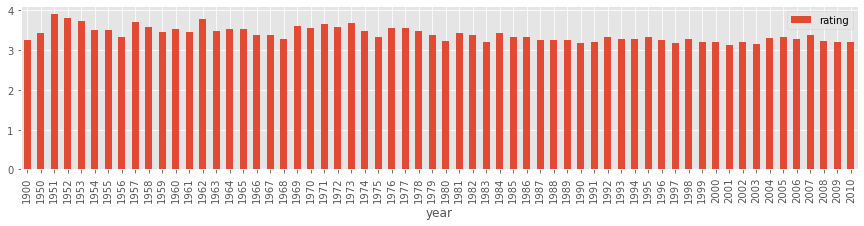

In [33]:
total_df.groupby('year').agg({'rating':'mean'}).plot(kind='bar')